### Business problem understanding

*The business objective for Cars24 is to accurately predict the selling price of second-hand cars based on various factors.

*identifying relevant features or variables that may impact the problem?

In [680]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.figure_factory as ff
import datetime as dt

### Data Understanding

In [681]:
df=pd.read_csv("train-data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [683]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [684]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [685]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [686]:
df['Transmission'].value_counts()

Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64

In [687]:
df['Location'].value_counts()

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64

### Data Preprocessing

#### Data cleaning

In [688]:
dtt = ['Mileage', 'Engine', 'Power']
for c in dtt :
    print(c,'value counts')
    print(df[c].str.split(' ').str[1].value_counts())
    print('-----------------------------------')

Mileage value counts
Mileage
kmpl     5951
km/kg      66
Name: count, dtype: int64
-----------------------------------
Engine value counts
Engine
CC    5983
Name: count, dtype: int64
-----------------------------------
Power value counts
Power
bhp    5983
Name: count, dtype: int64
-----------------------------------


In [689]:
df['Name'].value_counts()

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64

Cars' seats range is 0-10 (Seats with 0)!
There are two units of Mileage!
Remove CC && PHP
New Price contains many Nans
When doing data prediction (Engine ,Mileage ,and Power) types must be changed
Owner Type Must be change to be predicted
Name will be more understandable ( Brand , Model)


In [690]:
# Checking cars with 0 seats
df[df['Seats'] ==0]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [691]:
#dropping the coulumn
df.drop(index= 3999 , inplace=True)

In [692]:
# creating function to convert Km to mileage 
def convert(x):
    if str(x).endswith("km/kg"):
        return float(x.split(' ')[0])*0.74
    elif str(x).endswith("kmpl"):
        return float(x.split(' ')[0])

In [693]:
# Removing Strings
df['Engine'] = df['Engine'].str.rstrip(' CC')
df['Power'] = df['Power'].str.rstrip(' bhp')

In [694]:
df['Mileage']= df['Mileage'].apply(convert)

In [695]:
## Drop New Price columns as it is not useful
df.drop(columns=['New_Price','Unnamed: 0'] , inplace=True)

In [696]:
## creating to columns with Car brand and Name
df['Brand'] = df.Name.str.split(' ').str[0]
df['Model'] = df.Name.str.split(' ').str[1]

In [697]:
## representing name with first 3 names
df['Name']=df['Name'].str.split(' ').str.slice(0,3).str.join(' ')

In [698]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [699]:
df.dropna(inplace=True)

In [700]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

### Exploratory Data Analysis

In [701]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,19.684,998,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.670,1582,126.2,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199,88.7,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968,140.8,5.0,17.74,Audi,A4


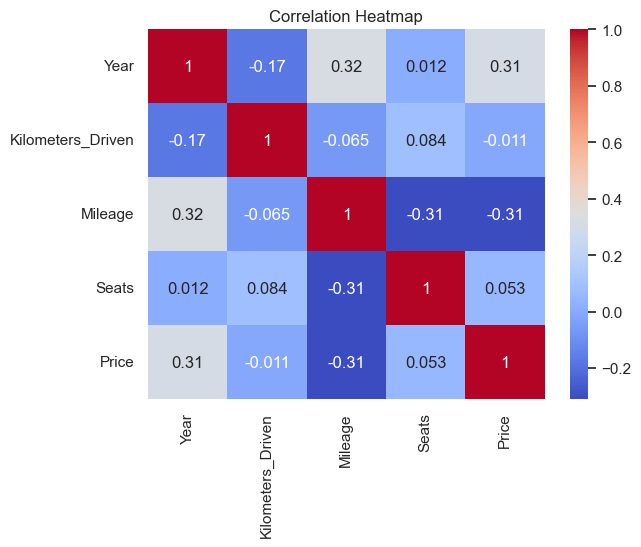

In [702]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Seats', 'Price']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   object 
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   object 
 9   Power              5974 non-null   object 
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
 12  Brand              5974 non-null   object 
 13  Model              5974 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 700.1+ KB


In [704]:
df_try = df.copy()
df_try['count'] = 1

#### Uni-variate

In [705]:
## 10 Most saled cars with their heights models
df1= df_try.groupby('Model')['count'].sum().sort_values(ascending=False).head(10).reset_index()
df1
fig=px.bar(x=df1['Model'],y=df1['count'] , title = 'Highest sales Cars ',)
fig.update_xaxes(title='Cars')
fig.update_yaxes(title='Total Sales')
fig.update_traces(marker_color='lightsalmon')
fig


In [706]:
df1= df_try.groupby('Model')['count'].sum().sort_values(ascending=False).head(10).reset_index()
df1

,Model,count
0,Swift,343
1,City,265
2,i20,247
3,Verna,170
4,Innova,164
5,Grand,156
6,i10,156
7,Wagon,153
8,Polo,151
9,Alto,143


In [707]:
## Distrbution of kilometers Driven by cars
px.box(x=df['Kilometers_Driven'])

In [708]:
## There is an outlier so we are going to remove it
df=df[df['Kilometers_Driven'] < 400000]

<Axes: xlabel='Kilometers_Driven'>

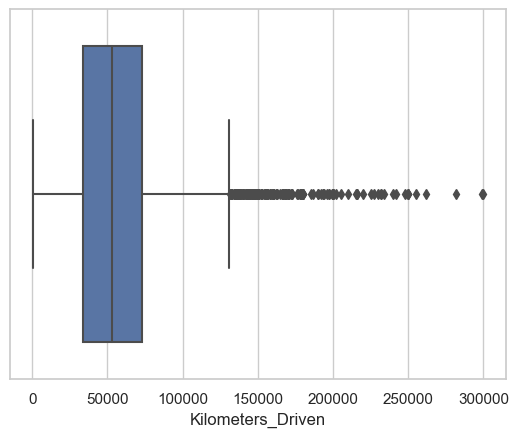

In [709]:
sns.boxplot(x=df['Kilometers_Driven'])

In [710]:
## Years Distrubtions
px.histogram(df['Year'])

Text(0.5, 1.0, 'Car Distribution by Transmission Type')

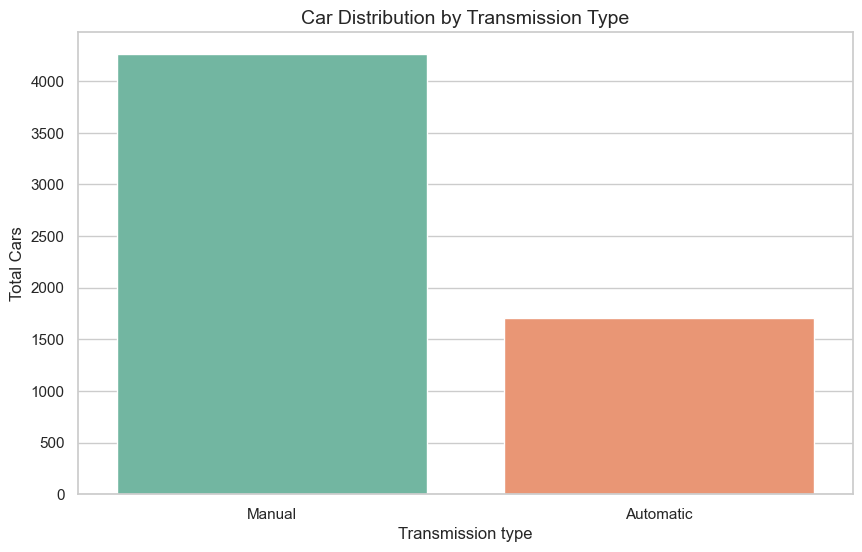

In [711]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Transmission', data=df, ax=ax, palette='Set2')
ax.set_xlabel('Transmission type', fontsize=12)
ax.set_ylabel('Total Cars', fontsize=12)
ax.set_title('Car Distribution by Transmission Type', fontsize=14)

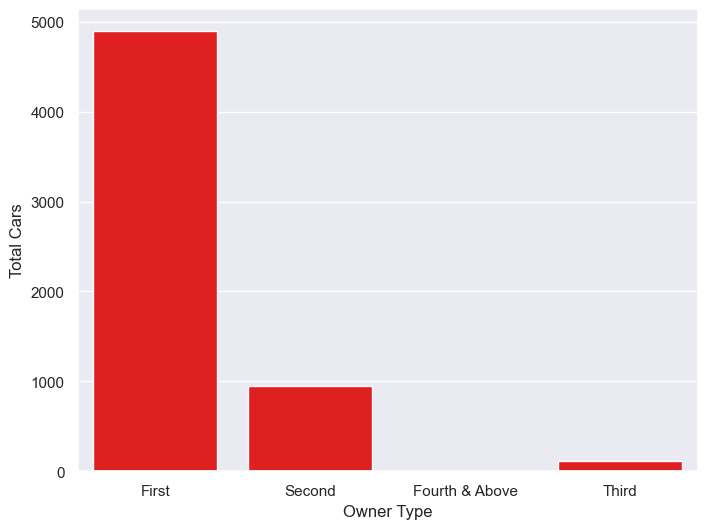

In [712]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Owner_Type', color='red')
plt.xlabel('Owner Type')
plt.ylabel('Total Cars')
plt.show()

In [713]:
## Locations
df2= df_try.groupby('Location')['count'].sum().sort_values(ascending=False).reset_index()
df2


,Location,count
0,Mumbai,784
1,Hyderabad,740
2,Kochi,648
3,Coimbatore,634
4,Pune,613
5,Delhi,549
6,Kolkata,530
7,Chennai,490
8,Jaipur,410
9,Bangalore,353


In [714]:
fig3=px.bar(x=df2['Location'] , y=df2['count'] , title = 'Locations with highest sales')
fig3.update_xaxes(title='Locations')
fig3.update_yaxes(title='Total Sales')
fig3.update_traces(marker_color='lightsalmon')
fig3

In [715]:
## Price Correlation with Other Numerical Factors

dft =df.select_dtypes((int ,float))
x=dft.corr()['Price'].sort_values(ascending=False).reset_index()
x.rename(columns=({'index':'Factor','Price':'Correlation'}),inplace=True)
x

,Factor,Correlation
0,Price,1.000000
1,Year,0.305547
2,Seats,0.053594
3,Kilometers_Driven,-0.185113
4,Mileage,-0.310203


In [716]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,19.684,998,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.670,1582,126.2,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199,88.7,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968,140.8,5.0,17.74,Audi,A4


### Train Test Split

In [717]:
# train test split

X = df.drop(['Price','Brand'] , axis =1)
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [718]:
# Data Preprocessing
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X_train.replace('null', np.nan, inplace=True)
X_test.replace('null', np.nan, inplace=True)

# Preprocessing for numerical data
N_Transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('scale', RobustScaler())])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[('encoding', BinaryEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', N_Transformer, ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']),
        ('cat', cat_transformer, ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Model'])])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


## MODELLING

### Linear Regression

In [719]:
# Model Importing
from sklearn.linear_model import LinearRegression

# Model Creation
model1 = LinearRegression()
model1.fit(X_train_preprocessed, y_train)

# Predictions
train_pred = model1.predict(X_train_preprocessed)
test_pred = model1.predict(X_test_preprocessed)

# Model Evaluation
from sklearn.metrics import mean_squared_error
print('train error',np.sqrt(mean_squared_error(y_train,train_pred)))
print('test error',np.sqrt(mean_squared_error(y_test,test_pred)))


from sklearn.metrics import r2_score
print('R2 of train data:', r2_score(y_train,train_pred ))
print('R2 of test data:', r2_score(y_test,test_pred ))

train error 5.6044267733013555
test error 6.772717285254839
R2 of train data: 0.729071363883737
R2 of test data: 0.6809673666214826


### Ridge Regression

In [720]:
# Model Importing
from sklearn.linear_model import Ridge

# Model Creation
model2 = Ridge()
model2.fit(X_train_preprocessed, y_train)

# Predictions
train_pred = model2.predict(X_train_preprocessed)
test_pred = model2.predict(X_test_preprocessed)

# Model Evaluation
from sklearn.metrics import mean_squared_error
print('train error',np.sqrt(mean_squared_error(y_train,train_pred)))
print('test error',np.sqrt(mean_squared_error(y_test,test_pred)))


from sklearn.metrics import r2_score
print('R2 of train data:', r2_score(y_train,train_pred ))
print('R2 of test data:', r2_score(y_test,test_pred ))

train error 5.60451110345002
test error 6.7706704719841175
R2 of train data: 0.7290632104632433
R2 of test data: 0.6811601700494804


### Polynomial Regression

In [721]:
# Import Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model3 = make_pipeline(PolynomialFeatures(2), Ridge())
model3.fit(X_train_preprocessed, y_train)

# Predictions
train_pred = model3.predict(X_train_preprocessed)
test_pred = model3.predict(X_test_preprocessed)

# Model Evaluation
from sklearn.metrics import mean_squared_error
print('train error',np.sqrt(mean_squared_error(y_train,train_pred)))
print('test error',np.sqrt(mean_squared_error(y_test,test_pred)))


from sklearn.metrics import r2_score
print('R2 of train data:', r2_score(y_train,train_pred ))
print('R2 of test data:', r2_score(y_test,test_pred ))

train error 3.247104708495632
test error 4.995804968986698
R2 of train data: 0.9090536865642355
R2 of test data: 0.8264118136674355


### Lasso

In [722]:
# Model Importing
from sklearn.linear_model import Lasso

# Model Creation
model4 = Lasso()
model4.fit(X_train_preprocessed, y_train)

# Predictions
train_pred = model2.predict(X_train_preprocessed)
test_pred = model2.predict(X_test_preprocessed)

# Model Evaluation
from sklearn.metrics import mean_squared_error
print('train error',np.sqrt(mean_squared_error(y_train,train_pred)))
print('test error',np.sqrt(mean_squared_error(y_test,test_pred)))


from sklearn.metrics import r2_score
print('R2 of train data:', r2_score(y_train,train_pred ))
print('R2 of test data:', r2_score(y_test,test_pred ))

train error 5.60451110345002
test error 6.7706704719841175
R2 of train data: 0.7290632104632433
R2 of test data: 0.6811601700494804


## Model selection

In [723]:

# Model Creation for LinearRegression
model1 = LinearRegression()
model1.fit(X_train_preprocessed, y_train)
train_pred1 = model1.predict(X_train_preprocessed)
test_pred1 = model1.predict(X_test_preprocessed)
rmse_train1 = np.sqrt(mean_squared_error(y_train, train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, test_pred1))
r2_train1 = r2_score(y_train, train_pred1)
r2_test1 = r2_score(y_test, test_pred1)

# Model Creation for Ridge
model2 = Ridge()
model2.fit(X_train_preprocessed, y_train)
train_pred2 = model2.predict(X_train_preprocessed)
test_pred2 = model2.predict(X_test_preprocessed)
rmse_train2 = np.sqrt(mean_squared_error(y_train, train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, test_pred2))
r2_train2 = r2_score(y_train, train_pred2)
r2_test2 = r2_score(y_test, test_pred2)

# Model Creation for polynomial
model3 = make_pipeline(PolynomialFeatures(2), Ridge())
model3.fit(X_train_preprocessed, y_train)
train_pred3 = model3.predict(X_train_preprocessed)
test_pred3 = model3.predict(X_test_preprocessed)
rmse_train3 = np.sqrt(mean_squared_error(y_train, train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, test_pred3))
r2_train3 = r2_score(y_train, train_pred3)
r2_test3 = r2_score(y_test, test_pred3)

# Model Creation for lasso
model4 = Lasso()
model4.fit(X_train_preprocessed, y_train)
train_pred4 = model4.predict(X_train_preprocessed)
test_pred4 = model4.predict(X_test_preprocessed)
rmse_train4 = np.sqrt(mean_squared_error(y_train, train_pred4))
rmse_test4 = np.sqrt(mean_squared_error(y_test, test_pred4))
r2_train4 = r2_score(y_train, train_pred4)
r2_test4 = r2_score(y_test, test_pred4)

# Create DataFrame
data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Polynomial Regression', 'Lasso'],
    'RMSE Train': [rmse_train1, rmse_train2, rmse_train3, rmse_train4],
    'RMSE Test': [rmse_test1, rmse_test2, rmse_test3, rmse_test4],
    'R2 Train': [r2_train1, r2_train2, r2_train3, r2_train4],
    'R2 Test': [r2_test1, r2_test2, r2_test3, r2_test4]
}
df = pd.DataFrame(data)

# Display the table
print(df)

                   Model  RMSE Train  RMSE Test  R2 Train   R2 Test
0      Linear Regression    5.604427   6.772717  0.729071  0.680967
1       Ridge Regression    5.604511   6.770670  0.729063  0.681160
2  Polynomial Regression    3.247105   4.995805  0.909054  0.826412
3                  Lasso    6.323072   7.437417  0.655135  0.615272


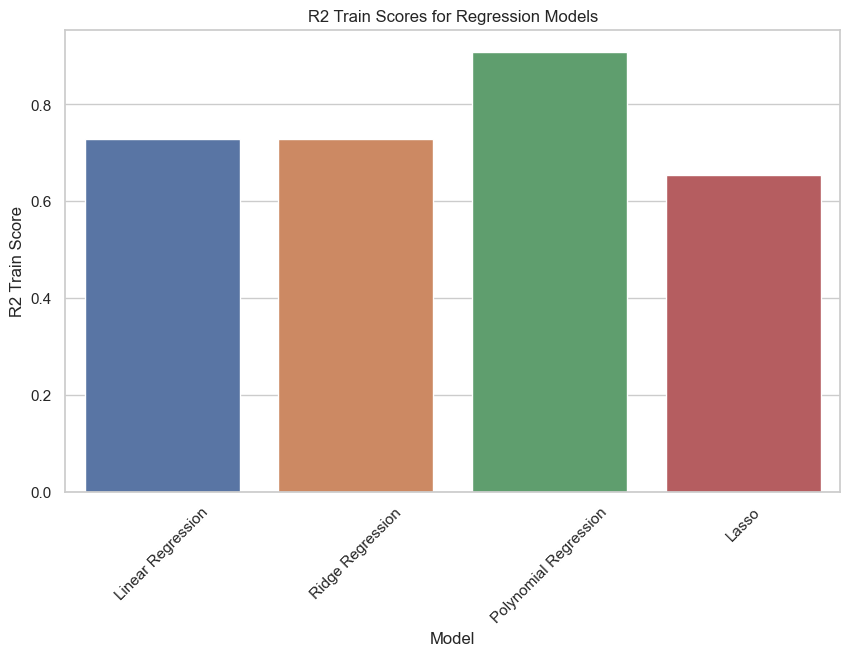

In [724]:
# Create barplot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2 Train", data=df)

# Set plot title and labels
plt.title("R2 Train Scores for Regression Models")
plt.xlabel("Model")
plt.ylabel("R2 Train Score")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

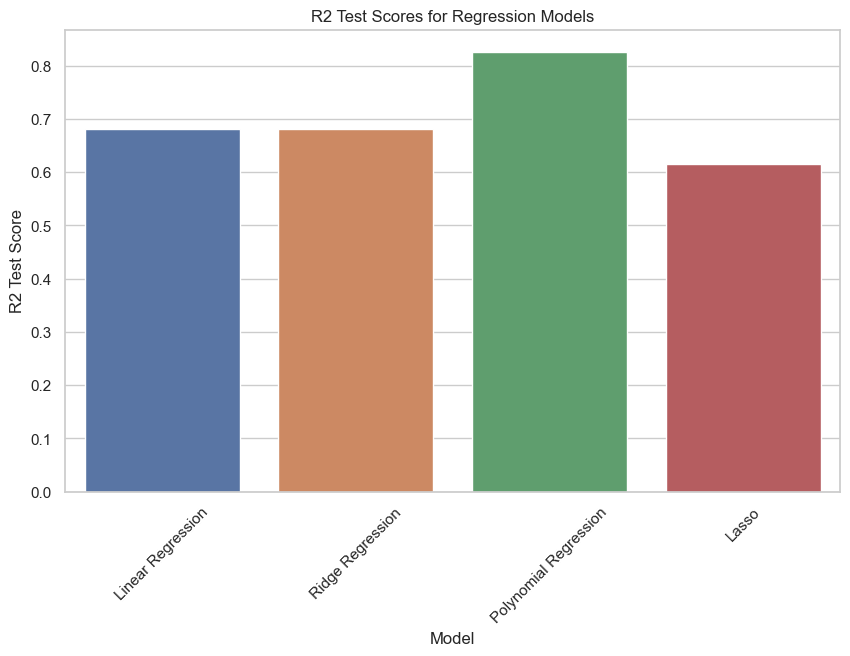

In [725]:
# Create barplot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2 Test", data=df)

# Set plot title and labels
plt.title("R2 Test Scores for Regression Models")
plt.xlabel("Model")
plt.ylabel("R2 Test Score")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### 1. is model overfiting or underfitting problem